In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
creditCardDF = pd.read_csv(r'/content/drive/MyDrive/credicard.csv')
creditCardDF.head(5)

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
fraudCardDF = creditCardDF[creditCardDF["Class"] == 1]
fraudCardDF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [ ]:
nonFraudCardDF = creditCardDF[creditCardDF["Class"] == 0]
nonFraudCardDF.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


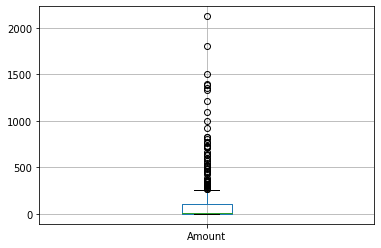

In [ ]:
fraudCardDF.boxplot("Amount")

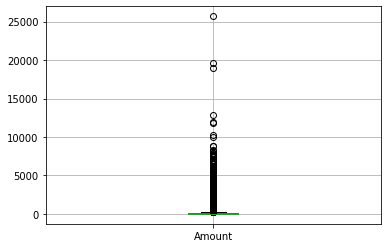

In [ ]:
nonFraudCardDF.boxplot("Amount")

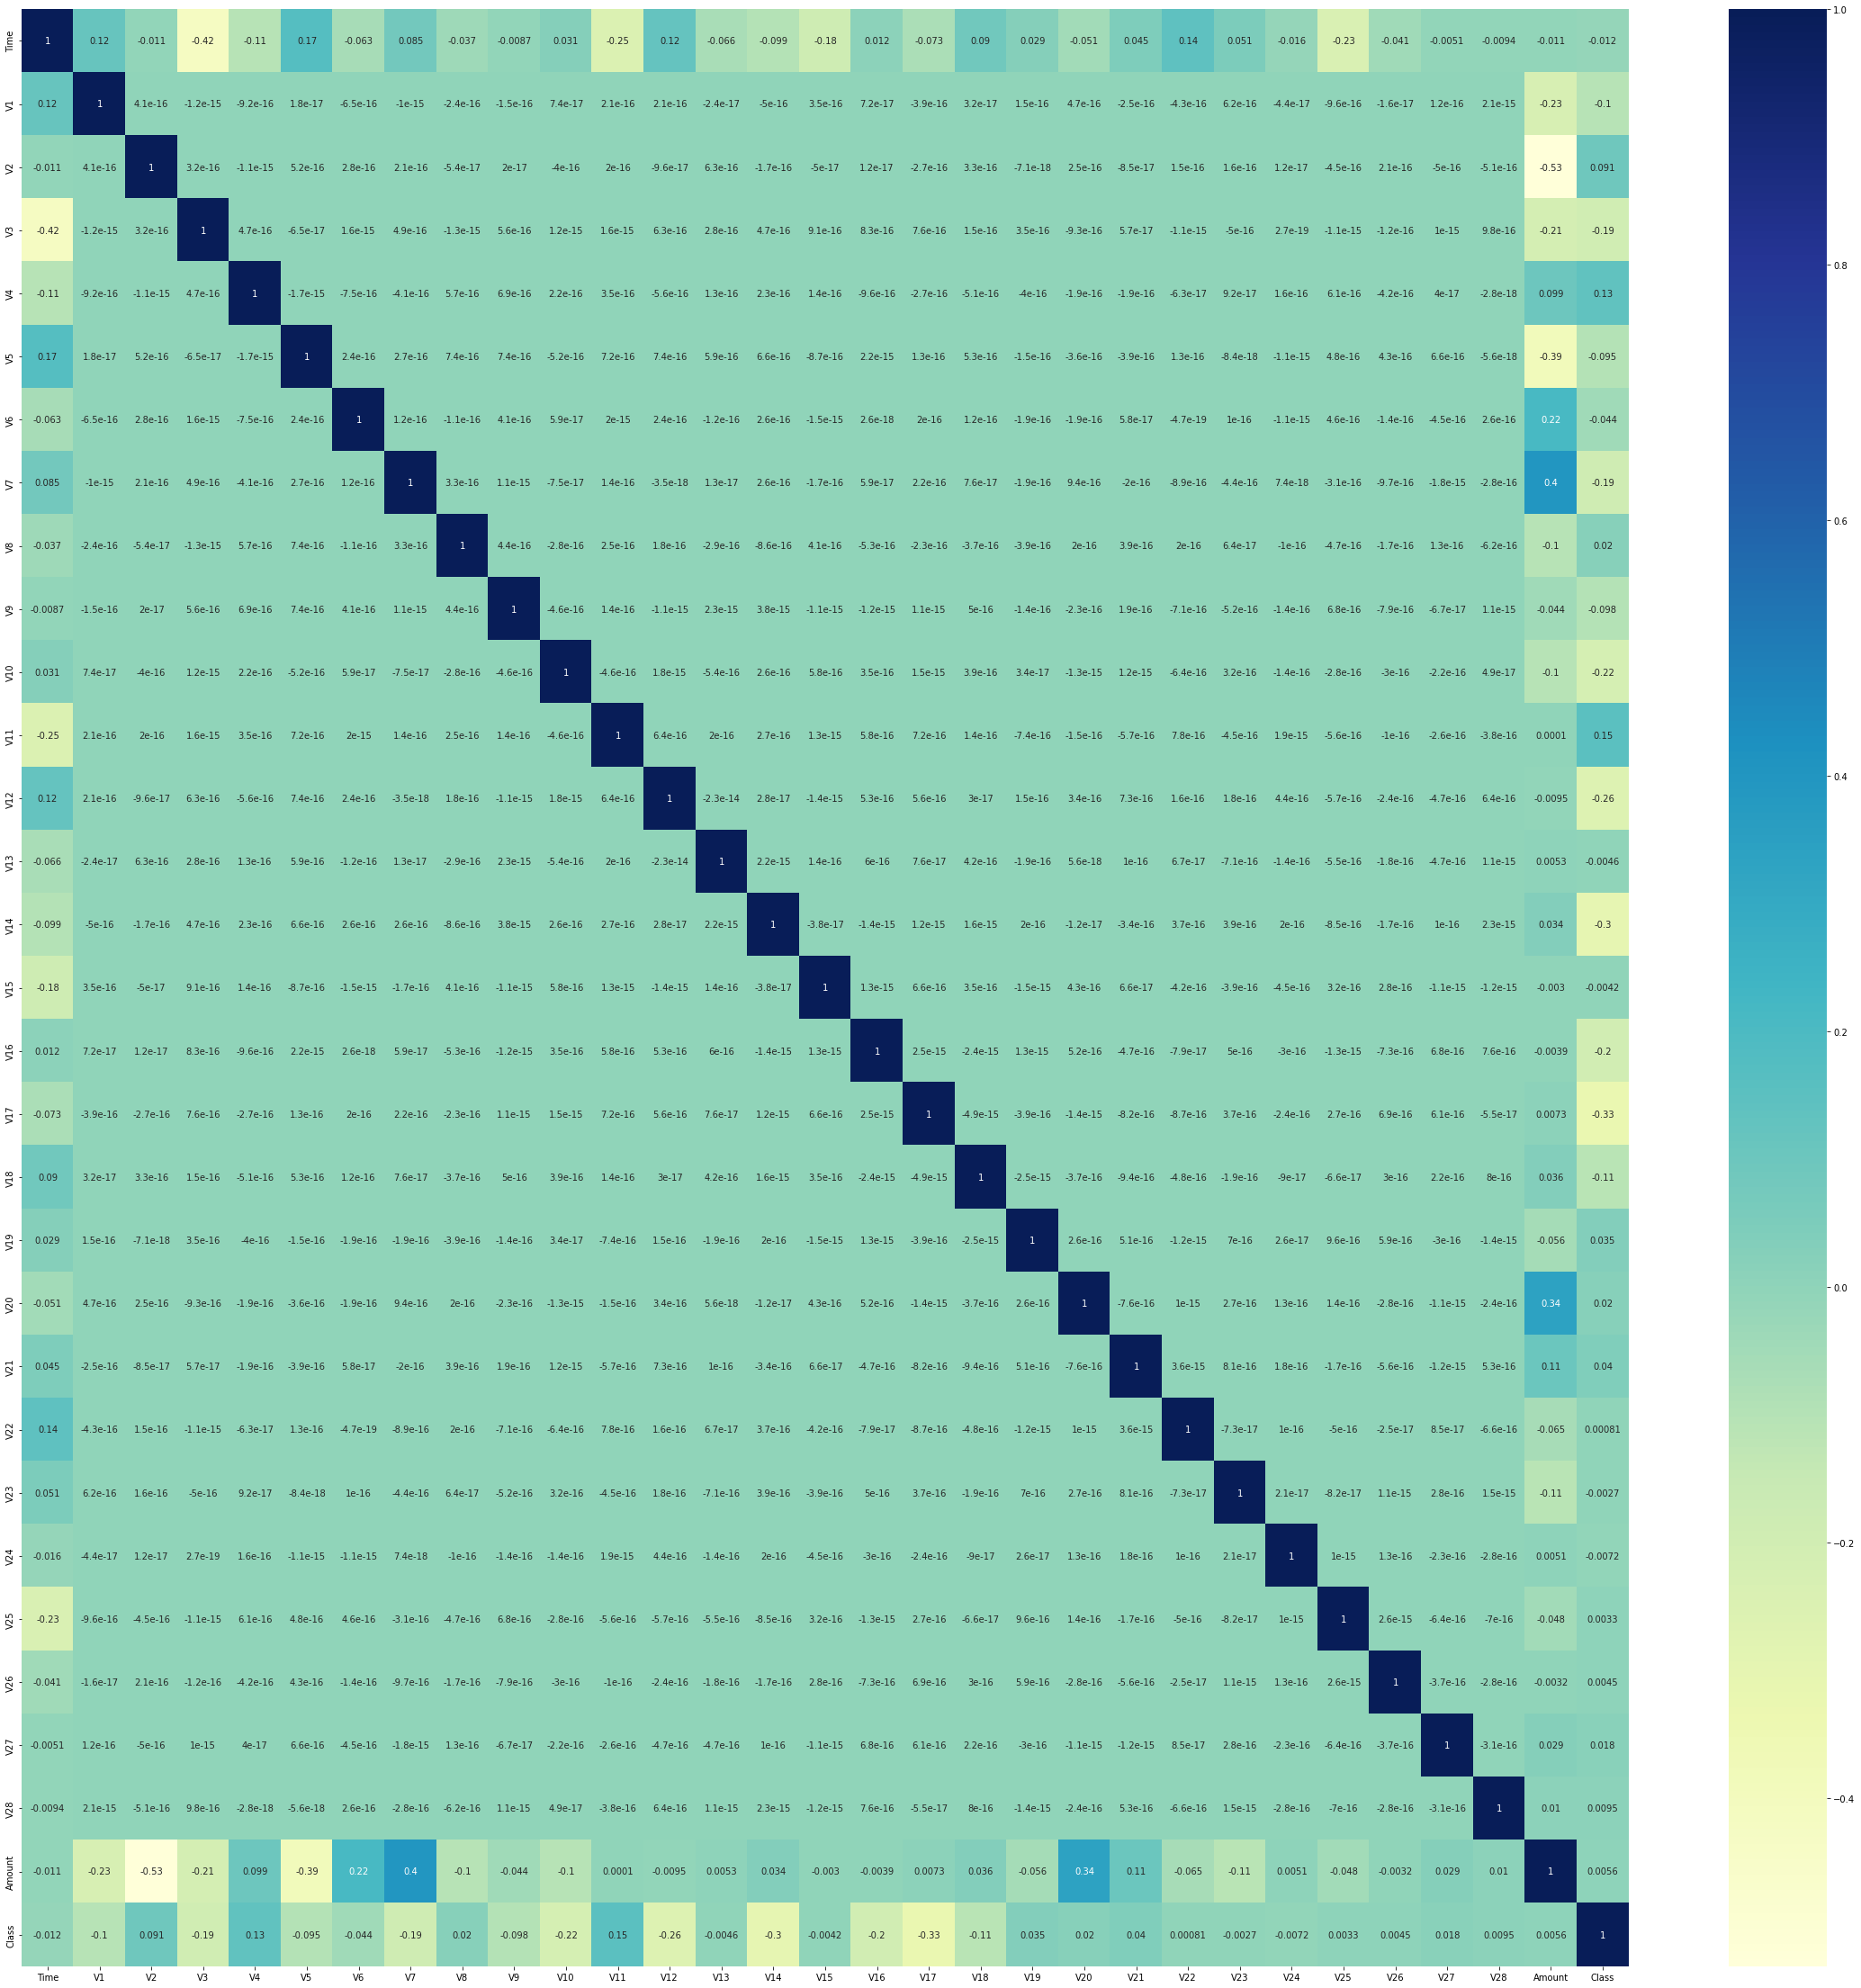

In [ ]:
f, ax = plt.subplots(figsize = (40, 40))
sns.heatmap(creditCardDF.corr(), annot = True, cmap="YlGnBu");

In [ ]:
features = creditCardDF.drop('Class', axis = 1)
labels = creditCardDF[['Class']]

In [ ]:
normalize = StandardScaler()
norm_features = normalize.fit_transform(features)

In [ ]:
normalize_for_challenger = StandardScaler()
norm_features_new = normalize_for_challenger.fit_transform(creditCardDF[['Amount', 'Time']])
norm_features_new.max()

102.36224270928423

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_features, labels, test_size = 0.3,random_state = 42)
y_test.value_counts()

Class
0        85307
1          136
dtype: int64

In [ ]:
clustering = KMeans(n_clusters = 4, random_state = 42).fit(creditCardDF)
creditCardDF['kmean'] = clustering.labels_
creditCardDF.loc[creditCardDF['Class'] == 1]['kmean'].value_counts()

0    173
3    157
2     89
1     73
Name: kmean, dtype: int64

In [ ]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
accurace_lr = accuracy_score(y_test, y_predict_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_predict_lr)
print('Result Logistic Regression')
print(classification_report(y_test, y_predict_lr))
print('Confusion matrix Logistic Regression')
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_lr)
plt.show()

Result Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Result MLP Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.78      0.82       136

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix Logistic Regression


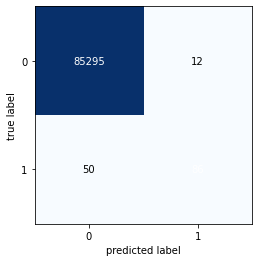

Confusion matrix MLP Classifier


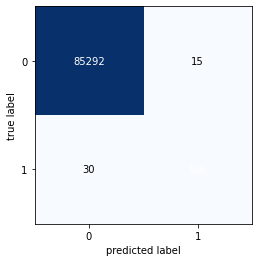

In [ ]:
mlp = MLPClassifier(alpha = 0.001, hidden_layer_sizes = (10,), activation = 'relu',solver = 'adam', random_state = 1)
mlp.fit(X_train, y_train)
y_predict_mlp = mlp.predict(X_test)
accurace_MLP = accuracy_score(y_test, y_predict_mlp)
confusion_matrix_mlp = confusion_matrix(y_test, y_predict_mlp)
print('Result MLP Classifier')
print(classification_report(y_test, y_predict_mlp))
print('Confusion matrix MLP Classifier')
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_mlp)
plt.show()

In [ ]:
# Subsampling process

# Finds the number of instances with class 1
n_fraude = len (creditCardDF[creditCardDF.Class==1])
indices_fraude = np.array (creditCardDF[creditCardDF.Class==1].index)
indices_sem_fraude=np.array (creditCardDF[creditCardDF.Class==0].index)

# Picks random indexes for normal data, gets the same amount for fraudulent transactions
np.random.seed(0)
escolha_sem_fraude = np.random.choice (indices_sem_fraude, n_fraude, replace = False )

# Gets the amoutn of data using indexes
indices_subamostragem=np.concatenate([indices_fraude,escolha_sem_fraude],axis=None)
dados_subamostrados = creditCardDF.iloc[indices_subamostragem,:]

# Identify input data for subsampling
entradas=dados_subamostrados[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 
                              'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 
                              'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 
                              'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 
                              'Amount', 'Time']]
saida=dados_subamostrados[['Class']]

In [ ]:
features = dados_subamostrados.drop('Class', axis = 1)
labels = dados_subamostrados[['Class']]
normalize = StandardScaler()
norm_features = normalize.fit_transform(features)
normalize_for_challenger = StandardScaler()
norm_features_new = normalize_for_challenger.fit_transform(dados_subamostrados[['Amount', 'Time']])
X_train, X_test, y_train, y_test = train_test_split(norm_features, labels, test_size = 0.3,random_state = 42)
y_train.value_counts()

Class
0        346
1        342
dtype: int64

In [ ]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
accurace_lr = accuracy_score(y_test, y_predict_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_predict_lr)
print('Result Logistic Regression')
print(classification_report(y_test, y_predict_lr))
print('Confusion matrix Logistic Regression')
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_lr)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Result Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       146
           1       0.98      0.87      0.93       150

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Result MLP Classifier
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       146
           1       0.99      0.89      0.93       150

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion matrix Logistic Regression


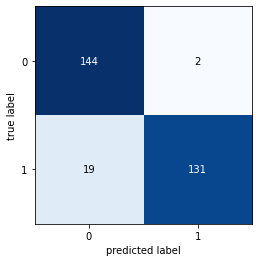

Confusion matrix MLP Classifier


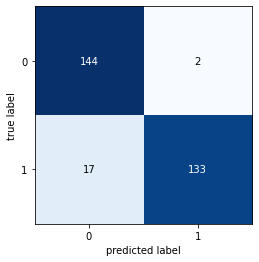

In [ ]:
mlp = MLPClassifier(alpha = 0.001, hidden_layer_sizes = (10,), activation = 'relu',solver = 'adam', random_state = 1)
mlp.fit(X_train, y_train)
y_predict_mlp = mlp.predict(X_test)
accurace_MLP = accuracy_score(y_test, y_predict_mlp)
confusion_matrix_mlp = confusion_matrix(y_test, y_predict_mlp)
print('Result MLP Classifier')
print(classification_report(y_test, y_predict_mlp))
print('Confusion matrix MLP Classifier')
fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_mlp)
plt.show()